In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re

**Get prediction data**

In [2]:
files = os.listdir("../logging")
rel_files = [f for f in files if "densnet" in f]
rel_files.sort()
#directory = "logging/20230810_165359_densnet_Ael8lbyb_md_h2.npz_densities_final"  # Fill this in
# Get latest run
directory = f"../logging/{rel_files[-1]}/preds.npz"
run_date = re.search(r'(.{16})densnet', rel_files[-1]).group(1)
run_date = run_date.replace("_", " ")
run_date = run_date[:-1]
run_date = run_date[:4] + "." + run_date[4:6] + "." + run_date[6:11] + ":" + run_date[11:13] + ":" + run_date[13:]

pred_data = np.load(directory, allow_pickle=True)
pred_data_idx = pred_data["data_idx"]
pred_densities = pred_data["pred_densities"]
pred_densities = np.reshape(pred_densities, (pred_densities.shape[0], 10, 20))

**Get original data**

In [3]:
orig_data = np.load("../data/md_h2.npz", allow_pickle=True)
orig_densities = orig_data["densities"][pred_data_idx]
orig_densities = np.reshape(orig_densities, (orig_densities.shape[0], 10, 20))

**Plot predicted densities**

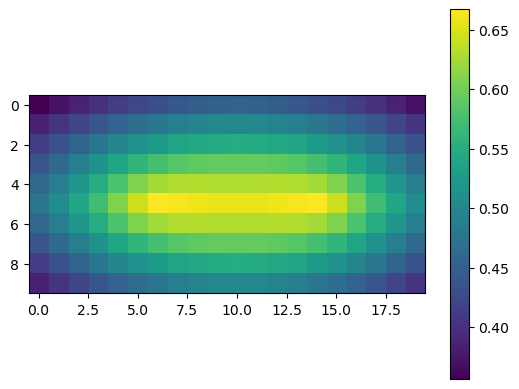

In [8]:
plot_idx = 20

plt.imshow(pred_densities[plot_idx], cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

**Plot real densities**

R: [[ 0.52464 -0.       0.     ]
 [-0.52464  0.      -0.     ]]
R: [[13.81034476  4.5         0.        ]
 [ 5.18965524  4.5         0.        ]]


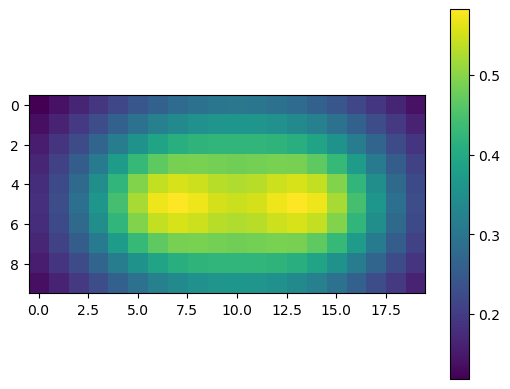

In [9]:
plt.imshow(orig_densities[plot_idx], cmap='viridis', interpolation='nearest')
R = orig_data["R"][plot_idx]
print("R:", R)
coords = orig_data["coords"][plot_idx]
# rescale R in x-direction
x_min = coords[:, 0].min()
x_max = coords[:, 0].max()
x_scale_factor = 9.5 * 2 / (x_max - x_min)  

y_min = coords[:, 1].min()
y_max = coords[:, 1].max()
y_scale_factor = 4.5 * 2 / (y_max - y_min)  

R = R * np.array([x_scale_factor, y_scale_factor, 1])[None, :]
R = R + np.array([9.5, 4.5, 0])
print("R:", R)

plt.colorbar()
plt.show()